In [1]:
import numpy as np
import os
import cv2
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
##if running on google colab with google drive.
##not recommended as colab CPU takes more than 30 minutes for this computation. 


# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from itertools import zip_longest
def grouper(n, iterable, fillvalue=None):

    args = [iter(iterable)] * n
    return zip_longest(fillvalue=fillvalue, *args)


keypoints_label=list(range(0,18))
print(keypoints_label)

##For testing
#x=[560.831, 194.386, 0.66248, 525.507, 249.299, 0.593418, 511.892, 247.365, 0.714152, 509.853, 335.541, 0.554194, 535.341, 415.816, 0.495816, 539.215, 251.25, 0.501823, 0, 0, 0, 0, 0, 0, 509.822, 413.881, 0.407317, 533.396, 531.438, 0.197238, 552.983, 660.722, 0.118897, 535.351, 411.923, 0.306555, 558.845, 525.54, 0.135417, 558.835, 654.829, 0.0919664, 556.869, 180.823, 0.731396, 0, 0, 0, 539.247, 184.633, 0.673713, 0, 0, 0]
#[x for x in grouper(3,x)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


##Setup data folder

##if using on google drive:
#dir='/content/drive/MyDrive/ITI110_DeepLearningProject/DataSets/GaHu-VideoDataset/coco_output'

##if on local machine. Modify as per required.
dir='./GaHu-VideoDataset/coco_output'


data_folder_list = [dir+"/Track_A/Sx_Track_1_Right/Keypoints/",dir+"/Track_A/Sx_Track_1_Left/Keypoints/",
                    dir+"/Track_B/Sx_Track_2_Right/Keypoints/",dir+"/Track_B/Sx_Track_2_Left/Keypoints/",
                    dir+"/Track_C/Sx_Track_3_Right/Keypoints/",dir+"/Track_C/Sx_Track_3_Left/Keypoints/"]

   

In [4]:
dir='./GaHu-VideoDataset/coco_output'
#data_folder_list = [dir+"/Track_A/Sx_Track_1_Right/Keypoints/",dir+"/Track_A/Sx_Track_1_Left/Keypoints/"]

data_folder_list = [dir+"/Track_A/Sx_Track_1_Right/Keypoints/",dir+"/Track_A/Sx_Track_1_Left/Keypoints/",
                    dir+"/Track_B/Sx_Track_2_Right/Keypoints/",dir+"/Track_B/Sx_Track_2_Left/Keypoints/",
                    dir+"/Track_C/Sx_Track_3_Right/Keypoints/",dir+"/Track_C/Sx_Track_3_Left/Keypoints/"]

In [214]:

keypoints_detected=[]      #list of json files with keypoints detected


#no_keypoints_detected=[]   #list of json files with no keypoints detected

range_valid_keypoints=[]


total_num_frames=[]          #total number of frames for each video
keypoints_perfile_pertrack= dict()
#x_data=[]
#y_data=[]

#num_frames_no_keypoints=[]
#grab last 4 characters of the file name:
#https://stackoverflow.com/questions/37796598/how-to-sort-file-names-in-a-particular-order-using-python

def last_19chars(jsonfile):
    
    return int(jsonfile[-19:-15])   

def last_8chars(lst):
    
    return lst[-8:-5]   

for data_folder in data_folder_list:

    for root, dirs, files in os.walk(data_folder , topdown=True):
        if len(dirs)>0:
            #print(dirs)
            subdirlist=sorted(dirs, key = last_8chars)
            #print(subdirlist)
            for eachdir in subdirlist:
                labelnum=int(eachdir[-8:-5].lstrip('0'))
                keypoint_list=[]
                eachjsonsubdir=os.path.join(root, eachdir)
                json_files = [pos_json for pos_json in os.listdir(eachjsonsubdir) if pos_json.endswith('.json')]
                #print(eachjsonsubdir)
                json_files=sorted(json_files, key = last_19chars)
                #print(json_files)
                total_num_frames.append(len(json_files))
                totalFrames=len(json_files)
                #print(totalFrames)
                num_frames_no_keypoints=[]   #number of frames for each video with no keypoints detected
                for file in json_files:


                    temp_df = json.load(open(eachjsonsubdir+'/'+file))


                    try:
                        kp_list=temp_df['people'][0]['pose_keypoints_2d']
                        #kp_count=sum(map (lambda x:x>0, kp_list[0::3]))
                        del kp_list[2::3]    #https://stackoverflow.com/questions/32925532/how-to-remove-delete-every-n-th-element-from-list
                        keypoints_detected.append(file)
                        keypoint_list.append(kp_list)
                        
                        #y_data.append(labelnum)
                        #x_data.append(kp_list)

                    except:
                        num_frames_no_keypoints.append(file)
                range_valid_keypoints.append(totalFrames-len(num_frames_no_keypoints))
                
                if keypoint_list:
                    #print(eachdir)
                    keypoints_perfile_pertrack[eachdir]=keypoint_list
                    #print(keypoints_perfile_pertrack[eachDirs])

print(len(keypoints_perfile_pertrack)) 
print(len(num_frames_no_keypoints))
print(sum(total_num_frames))
# print(len(x_data))
# print(len(y_data))
##print(np.array(x_data).shape)
#print(np.array(y_data).shape)
print(range_valid_keypoints)
#print(keypoints_perfile_pertrack.keys())
#print(len(keypoints_perfile_pertrack['S001_T1_R']))
#print(keypoints_perfile_pertrack['S001_T1_R'])
#print(keypoints_perfile_pertrack.keys())
            

264
54
26111
[67, 54, 38, 58, 75, 60, 59, 55, 45, 51, 17, 23, 9, 31, 47, 14, 29, 15, 22, 42, 70, 56, 54, 49, 69, 59, 64, 5, 30, 52, 60, 70, 31, 39, 50, 14, 62, 58, 47, 26, 51, 51, 56, 19, 68, 54, 56, 63, 81, 72, 61, 67, 41, 48, 19, 33, 37, 29, 54, 9, 36, 46, 29, 47, 79, 60, 50, 52, 71, 71, 67, 24, 54, 57, 63, 72, 38, 51, 57, 34, 66, 66, 55, 57, 58, 46, 59, 36, 64, 60, 45, 61, 79, 76, 64, 57, 31, 50, 20, 31, 21, 33, 55, 27, 12, 23, 17, 49, 84, 62, 49, 58, 70, 65, 61, 6, 42, 58, 63, 79, 41, 47, 49, 20, 65, 60, 47, 38, 57, 51, 59, 14, 68, 51, 52, 74, 79, 76, 61, 66, 43, 54, 20, 29, 31, 37, 49, 17, 34, 26, 33, 55, 95, 64, 45, 56, 73, 71, 63, 26, 57, 61, 65, 87, 46, 32, 57, 37, 68, 69, 54, 49, 58, 51, 65, 38, 67, 62, 36, 60, 72, 68, 66, 55, 46, 54, 19, 31, 17, 38, 57, 31, 29, 20, 26, 55, 74, 63, 51, 62, 70, 68, 67, 9, 37, 57, 67, 82, 48, 44, 53, 22, 68, 51, 54, 43, 60, 54, 62, 7, 61, 54, 56, 76, 79, 75, 56, 65, 49, 57, 13, 31, 25, 35, 56, 11, 25, 45, 20, 59, 86, 59, 56, 57, 72, 76, 67, 31, 

In [226]:
print('Max Number Of Valid Frames: ',max(range_valid_keypoints),'\n'
      'Min Number Of Valid Frames: ', min(range_valid_keypoints))
print('Vdieo No. For Max Valid Frames: ',range_valid_keypoints.index(95))
print('Video No. For Min Valid Frames: ',range_valid_keypoints.index(5))


Max Number Of Valid Frames:  95 
Min Number Of Valid Frames:  5
Vdieo No. For Max Valid Frames:  152
Video No. For Min Valid Frames:  27


In [7]:
from scipy import stats
import statistics

print(stats.describe(range_valid_keypoints))
print('median : ',statistics.median(range_valid_keypoints))

DescribeResult(nobs=264, minmax=(5, 95), mean=50.11363636363637, variance=340.07829243000344, skewness=-0.45345495079038284, kurtosis=-0.4213636901559661)
median :  54.0


In [8]:
pd.DataFrame(range_valid_keypoints).describe()

,0
count,264.000000
mean,50.113636
std,18.441212
min,5.000000
25%,37.000000
50%,54.000000
75%,63.000000
max,95.000000


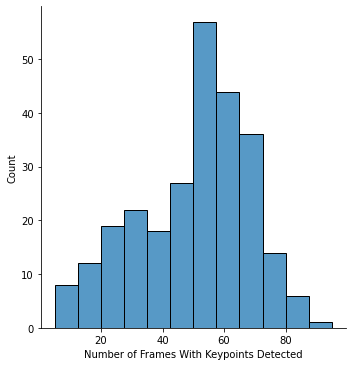

In [9]:
import seaborn as sns

sns.displot(range_valid_keypoints).set(xlabel='Number of Frames With Keypoints Detected')

In [10]:
keypoints_perfile_pertrack['S001_T1_R']

[[0,
  0,
  5.34913,
  247.352,
  5.38799,
  243.463,
  0,
  0,
  0,
  0,
  31.8385,
  245.391,
  0,
  0,
  0,
  0,
  5.37275,
  406.043,
  5.39652,
  537.288,
  53.3468,
  652.89,
  20.0374,
  409.928,
  33.8141,
  535.338,
  55.3205,
  650.911,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [55.4495,
  190.497,
  21.9483,
  245.46,
  5.34457,
  253.244,
  5.37678,
  341.39,
  0,
  0,
  37.7315,
  243.487,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  43.5801,
  435.426,
  49.4458,
  560.798,
  49.471,
  654.851,
  51.4454,
  178.842,
  0,
  0,
  27.9723,
  184.697,
  0,
  0],
 [78.8971,
  194.489,
  27.9352,
  243.474,
  24.0375,
  247.382,
  37.7399,
  357.055,
  65.1321,
  417.811,
  37.7322,
  241.413,
  0,
  0,
  0,
  0,
  43.6017,
  427.601,
  53.3472,
  545.123,
  55.3571,
  652.871,
  41.6568,
  419.752,
  45.5552,
  545.138,
  55.3227,
  650.967,
  71.044,
  180.805,
  0,
  0,
  55.3228,
  188.554,
  0,
  0],
 [82.7826,
  186.639,
  41.6279,
  239.544,
  33.7934,
  239.549,


In [168]:
df=pd.DataFrame.from_dict(keypoints_perfile_pertrack, orient='index')

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
S001_T1_R,"[0, 0, 5.34913, 247.352, 5.38799, 243.463, 0, ...","[55.4495, 190.497, 21.9483, 245.46, 5.34457, 2...","[78.8971, 194.489, 27.9352, 243.474, 24.0375, ...","[82.7826, 186.639, 41.6279, 239.544, 33.7934, ...","[108.259, 190.536, 73.001, 243.514, 65.1405, 2...","[133.714, 184.644, 92.6085, 245.399, 84.7347, ...","[147.383, 194.385, 104.307, 247.364, 94.5213, ...","[172.904, 202.324, 141.561, 253.218, 127.816, ...","[194.493, 194.453, 161.181, 245.45, 147.393, 2...","[206.168, 194.352, 168.992, 245.448, 151.413, ...","[237.528, 190.508, 202.292, 241.449, 174.819, ...","[255.217, 188.545, 221.904, 243.456, 190.55, 2...","[261.057, 188.571, 227.731, 241.468, 196.507, ...","[288.476, 196.361, 257.077, 247.394, 227.743, ...","[310.064, 194.442, 276.741, 253.214, 253.252, ...","[319.882, 196.462, 286.569, 251.243, 261.087, ...","[353.101, 196.391, 317.913, 255.126, 296.332, ...","[372.772, 196.513, 337.454, 257.057, 319.839, ...","[382.541, 196.508, 345.283, 257.066, 323.796, ...","[411.931, 194.495, 366.867, 251.268, 362.948, ...","[429.616, 192.444, 388.42, 251.267, 382.516, 2...","[443.256, 192.46, 398.198, 255.125, 398.232, 2...","[468.755, 194.489, 419.793, 253.246, 427.579, ...","[488.352, 196.462, 445.212, 247.379, 445.269, ...","[503.964, 198.382, 456.953, 253.2, 457.002, 25...","[527.569, 204.223, 494.158, 257.088, 488.304, ...","[554.906, 196.359, 513.828, 253.256, 505.932, ...","[560.831, 194.386, 525.507, 249.299, 511.892, ...","[590.206, 188.556, 552.995, 243.494, 537.294, ...","[603.945, 188.537, 564.747, 241.43, 552.951, 2...","[617.574, 192.434, 574.502, 243.428, 560.847, ...","[648.977, 198.419, 598.026, 249.28, 592.154, 2...","[664.638, 210.069, 613.712, 259.057, 613.703, ...","[678.3, 210.116, 629.385, 259.131, 623.477, 26...","[711.658, 212.115, 658.777, 257.125, 656.82, 2...","[727.352, 200.374, 682.221, 259.082, 680.303, ...","[733.252, 202.305, 688.16, 255.215, 690.12, 25...","[760.622, 196.419, 707.713, 245.395, 719.493, ...","[778.298, 194.384, 731.243, 245.376, 741.041, ...","[792.05, 194.39, 742.939, 245.369, 746.977, 25...","[815.493, 200.341, 770.466, 247.383, 776.357, ...","[836.993, 202.273, 789.995, 251.233, 795.948, ...","[846.866, 198.398, 799.791, 251.238, 807.654, ...","[884.037, 208.133, 831.168, 249.316, 839.065, ...","[899.777, 208.172, 854.671, 247.376, 854.767, ...","[907.605, 204.27, 862.531, 243.472, 868.307, 2...","[933.145, 196.492, 886.075, 241.464, 885.983, ...","[960.415, 196.512, 911.521, 245.369, 901.701, ...","[964.356, 196.414, 917.369, 241.485, 911.487, ...","[993.743, 204.229, 940.902, 251.244, 938.951, ...","[1009.41, 198.346, 964.368, 249.299, 958.477, ...","[1019.21, 200.364, 966.408, 255.128, 970.255, ...","[1044.76, 210.122, 997.757, 255.2, 1003.56, 25...","[1072.09, 208.152, 1021.19, 257.121, 1029.09, ...","[1076.1, 204.268, 1025.14, 253.243, 1038.85, 2...","[1105.39, 204.268, 1056.39, 245.448, 1070.13, ...","[1123.09, 198.433, 1070.19, 243.529, 1085.87, ...","[1127.01, 200.349, 1076.1, 243.5, 1093.68, 251...","[1154.48, 202.266, 1107.38, 249.316, 1121.11, ...","[0, 0, 1125.08, 249.307, 1144.63, 257.179, 116...","[0, 0, 1134.85, 253.211, 1152.43, 259.026, 116...","[0, 0, 1162.24, 253.192, 1181.78, 257.165, 118...","[0, 0, 1179.92, 249.332, 1195.59, 257.114, 119...","[0, 0, 1185.78, 249.328, 1199.51, 257.102, 120...","[0, 0, 1211.2, 243.496, 1219.05, 249.32, 1230....","[0, 0, 1228.87, 243.482, 1232.76, 251.284, 124...","[0, 0, 1238.7, 243.444, 1242.59, 257.09, 1236....",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
S002_T1_R,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[55.3432, 194.387, 39.6787,

In [169]:
#apply(last_8chars,df.index)

df.index=df.index.map(lambda x:int(last_8chars(x).lstrip('0')))


In [170]:
df.reset_index(inplace=True)
df.rename(columns={'index':'PersonLabel'}, inplace=True)

In [171]:
df.head()

,PersonLabel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,1,"[0, 0, 5.34913, 247.352, 5.38799, 243.463, 0, ...","[55.4495, 190.497, 21.9483, 245.46, 5.34457, 2...","[78.8971, 194.489, 27.9352, 243.474, 24.0375, ...","[82.7826, 186.639, 41.6279, 239.544, 33.7934, ...","[108.259, 190.536, 73.001, 243.514, 65.1405, 2...","[133.714, 184.644, 92.6085, 245.399, 84.7347, ...","[147.383, 194.385, 104.307, 247.364, 94.5213, ...","[172.904, 202.324, 141.561, 253.218, 127.816, ...","[194.493, 194.453, 161.181, 245.45, 147.393, 2...","[206.168, 194.352, 168.992, 245.448, 151.413, ...","[237.528, 190.508, 202.292, 241.449, 174.819, ...","[255.217, 188.545, 221.904, 243.456, 190.55, 2...","[261.057, 188.571, 227.731, 241.468, 196.507, ...","[288.476, 196.361, 257.077, 247.394, 227.743, ...","[310.064, 194.442, 276.741, 253.214, 253.252, ...","[319.882, 196.462, 286.569, 251.243, 261.087, ...","[353.101, 196.391, 317.913, 255.126, 296.332, ...","[372.772, 196.513, 337.454, 257.057, 319.839, ...","[382.541, 196.508, 345.283, 257.066, 323.796, ...","[411.931, 194.495, 366.867, 251.268, 362.948, ...","[429.616, 192.444, 388.42, 251.267, 382.516, 2...","[443.256, 192.46, 398.198, 255.125, 398.232, 2...","[468.755, 194.489, 419.793, 253.246, 427.579, ...","[488.352, 196.462, 445.212, 247.379, 445.269, ...","[503.964, 198.382, 456.953, 253.2, 457.002, 25...","[527.569, 204.223, 494.158, 257.088, 488.304, ...","[554.906, 196.359, 513.828, 253.256, 505.932, ...","[560.831, 194.386, 525.507, 249.299, 511.892, ...","[590.206, 188.556, 552.995, 243.494, 537.294, ...","[603.945, 188.537, 564.747, 241.43, 552.951, 2...","[617.574, 192.434, 574.502, 243.428, 560.847, ...","[648.977, 198.419, 598.026, 249.28, 592.154, 2...","[664.638, 210.069, 613.712, 259.057, 613.703, ...","[678.3, 210.116, 629.385, 259.131, 623.477, 26...","[711.658, 212.115, 658.777, 257.125, 656.82, 2...","[727.352, 200.374, 682.221, 259.082, 680.303, ...","[733.252, 202.305, 688.16, 255.215, 690.12, 25...","[760.622, 196.419, 707.713, 245.395, 719.493, ...","[778.298, 194.384, 731.243, 245.376, 741.041, ...","[792.05, 194.39, 742.939, 245.369, 746.977, 25...","[815.493, 200.341, 770.466, 247.383, 776.357, ...","[836.993, 202.273, 789.995, 251.233, 795.948, ...","[846.866, 198.398, 799.791, 251.238, 807.654, ...","[884.037, 208.133, 831.168, 249.316, 839.065, ...","[899.777, 208.172, 854.671, 247.376, 854.767, ...","[907.605, 204.27, 862.531, 243.472, 868.307, 2...","[933.145, 196.492, 886.075, 241.464, 885.983, ...","[960.415, 196.512, 911.521, 245.369, 901.701, ...","[964.356, 196.414, 917.369, 241.485, 911.487, ...","[993.743, 204.229, 940.902, 251.244, 938.951, ...","[1009.41, 198.346, 964.368, 249.299, 958.477, ...","[1019.21, 200.364, 966.408, 255.128, 970.255, ...","[1044.76, 210.122, 997.757, 255.2, 1003.56, 25...","[1072.09, 208.152, 1021.19, 257.121, 1029.09, ...","[1076.1, 204.268, 1025.14, 253.243, 1038.85, 2...","[1105.39, 204.268, 1056.39, 245.448, 1070.13, ...","[1123.09, 198.433, 1070.19, 243.529, 1085.87, ...","[1127.01, 200.349, 1076.1, 243.5, 1093.68, 251...","[1154.48, 202.266, 1107.38, 249.316, 1121.11, ...","[0, 0, 1125.08, 249.307, 1144.63, 257.179, 116...","[0, 0, 1134.85, 253.211, 1152.43, 259.026, 116...","[0, 0, 1162.24, 253.192, 1181.78, 257.165, 118...","[0, 0, 1179.92, 249.332, 1195.59, 257.114, 119...","[0, 0, 1185.78, 249.328, 1199.51, 257.102, 120...","[0, 0, 1211.2, 243.496, 1219.05, 249.32, 1230....","[0, 0, 1228.87, 243.482, 1232.76, 251.284, 124...","[0, 0, 1238.7, 243.444, 1242.59, 257.09, 1236....",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[55.3432, 194.387, 39.6787,

In [172]:
df[df['PersonLabel']==1]

,PersonLabel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,1,"[0, 0, 5.34913, 247.352, 5.38799, 243.463, 0, ...","[55.4495, 190.497, 21.9483, 245.46, 5.34457, 2...","[78.8971, 194.489, 27.9352, 243.474, 24.0375, ...","[82.7826, 186.639, 41.6279, 239.544, 33.7934, ...","[108.259, 190.536, 73.001, 243.514, 65.1405, 2...","[133.714, 184.644, 92.6085, 245.399, 84.7347, ...","[147.383, 194.385, 104.307, 247.364, 94.5213, ...","[172.904, 202.324, 141.561, 253.218, 127.816, ...","[194.493, 194.453, 161.181, 245.45, 147.393, 2...","[206.168, 194.352, 168.992, 245.448, 151.413, ...","[237.528, 190.508, 202.292, 241.449, 174.819, ...","[255.217, 188.545, 221.904, 243.456, 190.55, 2...","[261.057, 188.571, 227.731, 241.468, 196.507, ...","[288.476, 196.361, 257.077, 247.394, 227.743, ...","[310.064, 194.442, 276.741, 253.214, 253.252, ...","[319.882, 196.462, 286.569, 251.243, 261.087, ...","[353.101, 196.391, 317.913, 255.126, 296.332, ...","[372.772, 196.513, 337.454, 257.057, 319.839, ...","[382.541, 196.508, 345.283, 257.066, 323.796, ...","[411.931, 194.495, 366.867, 251.268, 362.948, ...","[429.616, 192.444, 388.42, 251.267, 382.516, 2...","[443.256, 192.46, 398.198, 255.125, 398.232, 2...","[468.755, 194.489, 419.793, 253.246, 427.579, ...","[488.352, 196.462, 445.212, 247.379, 445.269, ...","[503.964, 198.382, 456.953, 253.2, 457.002, 25...","[527.569, 204.223, 494.158, 257.088, 488.304, ...","[554.906, 196.359, 513.828, 253.256, 505.932, ...","[560.831, 194.386, 525.507, 249.299, 511.892, ...","[590.206, 188.556, 552.995, 243.494, 537.294, ...","[603.945, 188.537, 564.747, 241.43, 552.951, 2...","[617.574, 192.434, 574.502, 243.428, 560.847, ...","[648.977, 198.419, 598.026, 249.28, 592.154, 2...","[664.638, 210.069, 613.712, 259.057, 613.703, ...","[678.3, 210.116, 629.385, 259.131, 623.477, 26...","[711.658, 212.115, 658.777, 257.125, 656.82, 2...","[727.352, 200.374, 682.221, 259.082, 680.303, ...","[733.252, 202.305, 688.16, 255.215, 690.12, 25...","[760.622, 196.419, 707.713, 245.395, 719.493, ...","[778.298, 194.384, 731.243, 245.376, 741.041, ...","[792.05, 194.39, 742.939, 245.369, 746.977, 25...","[815.493, 200.341, 770.466, 247.383, 776.357, ...","[836.993, 202.273, 789.995, 251.233, 795.948, ...","[846.866, 198.398, 799.791, 251.238, 807.654, ...","[884.037, 208.133, 831.168, 249.316, 839.065, ...","[899.777, 208.172, 854.671, 247.376, 854.767, ...","[907.605, 204.27, 862.531, 243.472, 868.307, 2...","[933.145, 196.492, 886.075, 241.464, 885.983, ...","[960.415, 196.512, 911.521, 245.369, 901.701, ...","[964.356, 196.414, 917.369, 241.485, 911.487, ...","[993.743, 204.229, 940.902, 251.244, 938.951, ...","[1009.41, 198.346, 964.368, 249.299, 958.477, ...","[1019.21, 200.364, 966.408, 255.128, 970.255, ...","[1044.76, 210.122, 997.757, 255.2, 1003.56, 25...","[1072.09, 208.152, 1021.19, 257.121, 1029.09, ...","[1076.1, 204.268, 1025.14, 253.243, 1038.85, 2...","[1105.39, 204.268, 1056.39, 245.448, 1070.13, ...","[1123.09, 198.433, 1070.19, 243.529, 1085.87, ...","[1127.01, 200.349, 1076.1, 243.5, 1093.68, 251...","[1154.48, 202.266, 1107.38, 249.316, 1121.11, ...","[0, 0, 1125.08, 249.307, 1144.63, 257.179, 116...","[0, 0, 1134.85, 253.211, 1152.43, 259.026, 116...","[0, 0, 1162.24, 253.192, 1181.78, 257.165, 118...","[0, 0, 1179.92, 249.332, 1195.59, 257.114, 119...","[0, 0, 1185.78, 249.328, 1199.51, 257.102, 120...","[0, 0, 1211.2, 243.496, 1219.05, 249.32, 1230....","[0, 0, 1228.87, 243.482, 1232.76, 251.284, 124...","[0, 0, 1238.7, 243.444, 1242.59, 257.09, 1236....",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44,1,"[1232.87, 210.144, 1279.84, 257.06, 1244.5, 25...","[1226.86, 210.04, 1254.36,

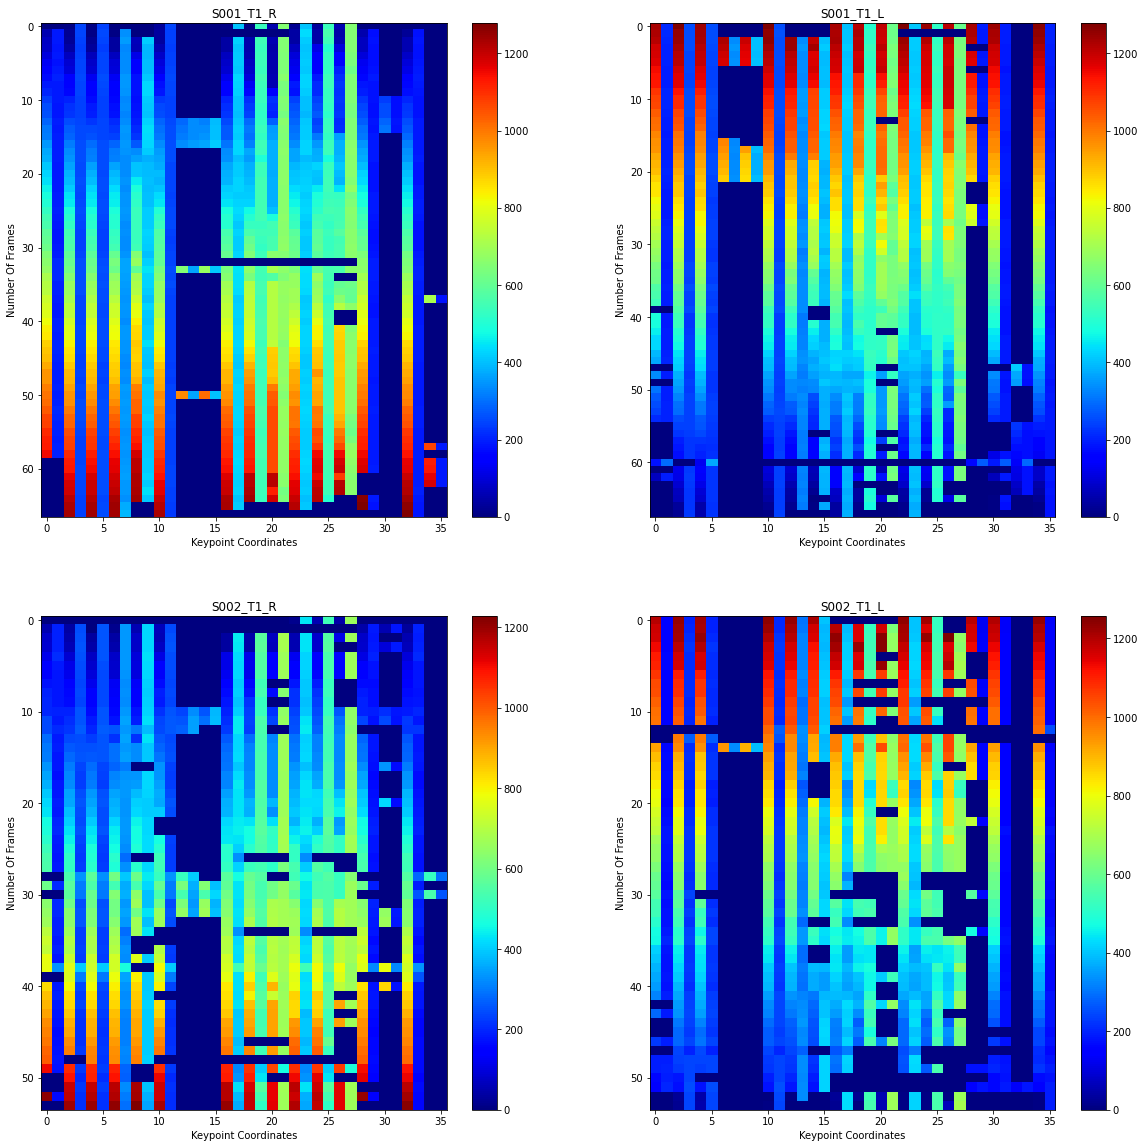

In [173]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
im0=ax[0][0].imshow(keypoints_perfile_pertrack['S001_T1_R'],cmap=plt.cm.jet, aspect='auto')
fig.colorbar(im0,ax=ax[0][0], shrink=1)
ax[0, 0].set_title('S001_T1_R')

im1=ax[0][1].imshow(keypoints_perfile_pertrack['S001_T1_L'],cmap=plt.cm.jet, aspect='auto')
fig.colorbar(im1,ax=ax[0][1], shrink=1)
ax[0, 1].set_title('S001_T1_L')

im3=ax[1][0].imshow(keypoints_perfile_pertrack['S002_T1_R'],cmap=plt.cm.jet, aspect='auto')
fig.colorbar(im3,ax=ax[1][0], shrink=1)
ax[1, 0].set_title('S002_T1_R')

im4=ax[1][1].imshow(keypoints_perfile_pertrack['S002_T1_L'],cmap=plt.cm.jet, aspect='auto')
fig.colorbar(im4,ax=ax[1][1], shrink=1)
ax[1, 1].set_title('S002_T1_L')

for axs in ax.flat:
    axs.set(xlabel='Keypoint Coordinates', ylabel='Number Of Frames')

#im=ax.imshow(keypoints_perfile_pertrack['S001_T1_R'],cmap=plt.cm.jet)


In [174]:
keypoints_perfile_pertrack['S001_T1_R']

[[0,
  0,
  5.34913,
  247.352,
  5.38799,
  243.463,
  0,
  0,
  0,
  0,
  31.8385,
  245.391,
  0,
  0,
  0,
  0,
  5.37275,
  406.043,
  5.39652,
  537.288,
  53.3468,
  652.89,
  20.0374,
  409.928,
  33.8141,
  535.338,
  55.3205,
  650.911,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [55.4495,
  190.497,
  21.9483,
  245.46,
  5.34457,
  253.244,
  5.37678,
  341.39,
  0,
  0,
  37.7315,
  243.487,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  43.5801,
  435.426,
  49.4458,
  560.798,
  49.471,
  654.851,
  51.4454,
  178.842,
  0,
  0,
  27.9723,
  184.697,
  0,
  0],
 [78.8971,
  194.489,
  27.9352,
  243.474,
  24.0375,
  247.382,
  37.7399,
  357.055,
  65.1321,
  417.811,
  37.7322,
  241.413,
  0,
  0,
  0,
  0,
  43.6017,
  427.601,
  53.3472,
  545.123,
  55.3571,
  652.871,
  41.6568,
  419.752,
  45.5552,
  545.138,
  55.3227,
  650.967,
  71.044,
  180.805,
  0,
  0,
  55.3228,
  188.554,
  0,
  0],
 [82.7826,
  186.639,
  41.6279,
  239.544,
  33.7934,
  239.549,


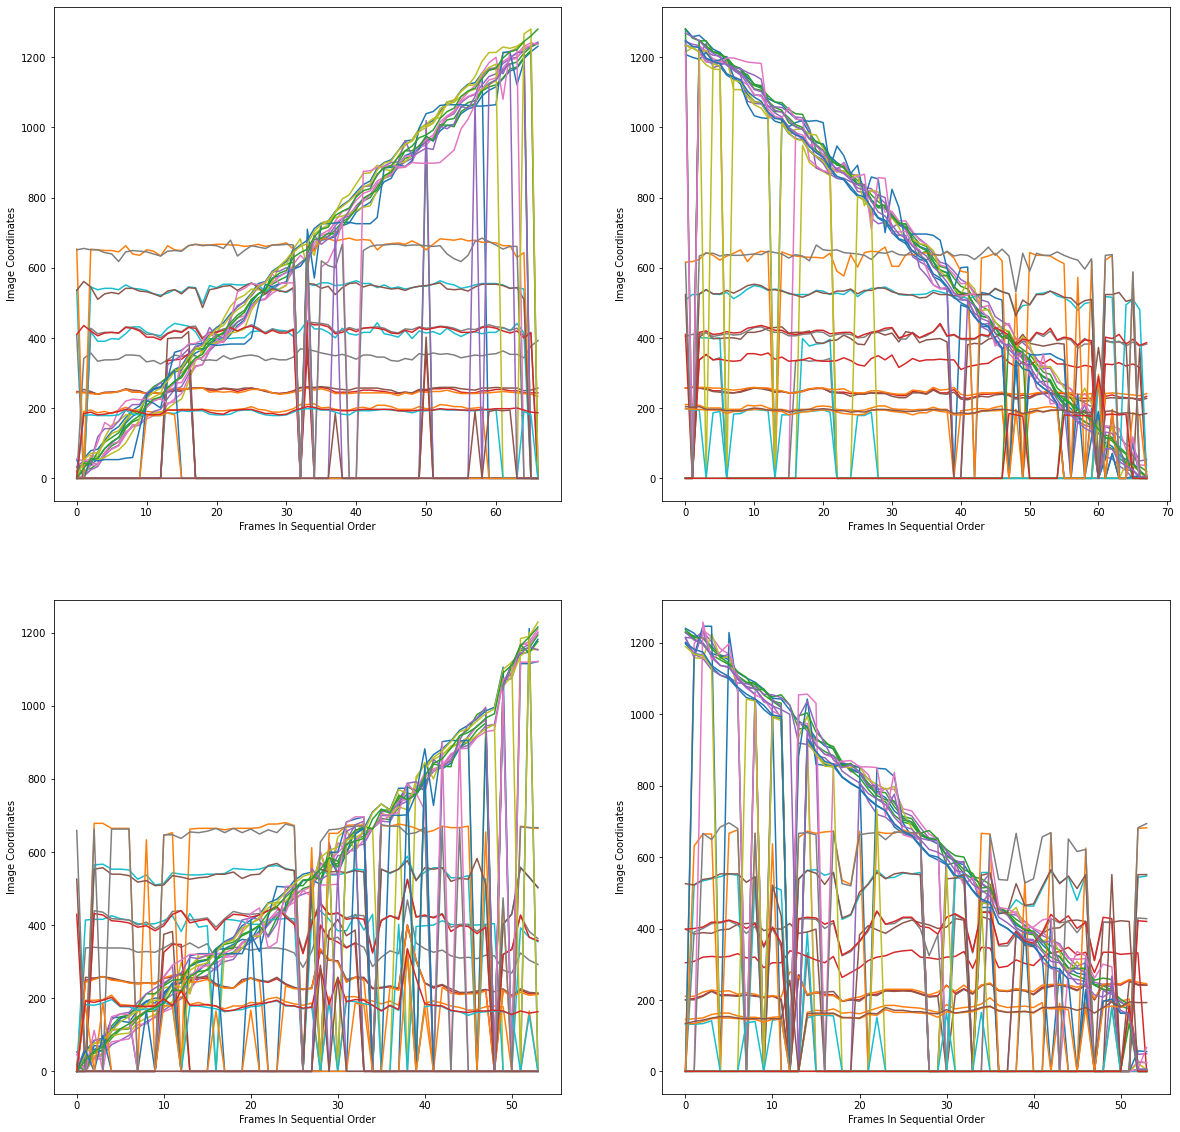

In [175]:
#x-axis is the sequential frames with non-empty keypoints
#y-axis is the x or y value of a coordinate point of a keypoint.  
fig, ax = plt.subplots(2,2,figsize=(20,20))

im0=ax[0,0].plot(keypoints_perfile_pertrack['S001_T1_R'])

im1=ax[0,1].plot(keypoints_perfile_pertrack['S001_T1_L'])


im3=ax[1,0].plot(keypoints_perfile_pertrack['S002_T1_R'])

im1=ax[1,1].plot(keypoints_perfile_pertrack['S002_T1_L'])


for axs in ax.flat:
    axs.set(xlabel='Frames In Sequential Order', ylabel='Image Coordinates')

#plot for same label
y_data=np.array(y_data)
cond=[y_data==30]
choice=[y_data]
selected=np.select(cond, choice)
selected.sum()


In [176]:
df.head()

,PersonLabel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,1,"[0, 0, 5.34913, 247.352, 5.38799, 243.463, 0, ...","[55.4495, 190.497, 21.9483, 245.46, 5.34457, 2...","[78.8971, 194.489, 27.9352, 243.474, 24.0375, ...","[82.7826, 186.639, 41.6279, 239.544, 33.7934, ...","[108.259, 190.536, 73.001, 243.514, 65.1405, 2...","[133.714, 184.644, 92.6085, 245.399, 84.7347, ...","[147.383, 194.385, 104.307, 247.364, 94.5213, ...","[172.904, 202.324, 141.561, 253.218, 127.816, ...","[194.493, 194.453, 161.181, 245.45, 147.393, 2...","[206.168, 194.352, 168.992, 245.448, 151.413, ...","[237.528, 190.508, 202.292, 241.449, 174.819, ...","[255.217, 188.545, 221.904, 243.456, 190.55, 2...","[261.057, 188.571, 227.731, 241.468, 196.507, ...","[288.476, 196.361, 257.077, 247.394, 227.743, ...","[310.064, 194.442, 276.741, 253.214, 253.252, ...","[319.882, 196.462, 286.569, 251.243, 261.087, ...","[353.101, 196.391, 317.913, 255.126, 296.332, ...","[372.772, 196.513, 337.454, 257.057, 319.839, ...","[382.541, 196.508, 345.283, 257.066, 323.796, ...","[411.931, 194.495, 366.867, 251.268, 362.948, ...","[429.616, 192.444, 388.42, 251.267, 382.516, 2...","[443.256, 192.46, 398.198, 255.125, 398.232, 2...","[468.755, 194.489, 419.793, 253.246, 427.579, ...","[488.352, 196.462, 445.212, 247.379, 445.269, ...","[503.964, 198.382, 456.953, 253.2, 457.002, 25...","[527.569, 204.223, 494.158, 257.088, 488.304, ...","[554.906, 196.359, 513.828, 253.256, 505.932, ...","[560.831, 194.386, 525.507, 249.299, 511.892, ...","[590.206, 188.556, 552.995, 243.494, 537.294, ...","[603.945, 188.537, 564.747, 241.43, 552.951, 2...","[617.574, 192.434, 574.502, 243.428, 560.847, ...","[648.977, 198.419, 598.026, 249.28, 592.154, 2...","[664.638, 210.069, 613.712, 259.057, 613.703, ...","[678.3, 210.116, 629.385, 259.131, 623.477, 26...","[711.658, 212.115, 658.777, 257.125, 656.82, 2...","[727.352, 200.374, 682.221, 259.082, 680.303, ...","[733.252, 202.305, 688.16, 255.215, 690.12, 25...","[760.622, 196.419, 707.713, 245.395, 719.493, ...","[778.298, 194.384, 731.243, 245.376, 741.041, ...","[792.05, 194.39, 742.939, 245.369, 746.977, 25...","[815.493, 200.341, 770.466, 247.383, 776.357, ...","[836.993, 202.273, 789.995, 251.233, 795.948, ...","[846.866, 198.398, 799.791, 251.238, 807.654, ...","[884.037, 208.133, 831.168, 249.316, 839.065, ...","[899.777, 208.172, 854.671, 247.376, 854.767, ...","[907.605, 204.27, 862.531, 243.472, 868.307, 2...","[933.145, 196.492, 886.075, 241.464, 885.983, ...","[960.415, 196.512, 911.521, 245.369, 901.701, ...","[964.356, 196.414, 917.369, 241.485, 911.487, ...","[993.743, 204.229, 940.902, 251.244, 938.951, ...","[1009.41, 198.346, 964.368, 249.299, 958.477, ...","[1019.21, 200.364, 966.408, 255.128, 970.255, ...","[1044.76, 210.122, 997.757, 255.2, 1003.56, 25...","[1072.09, 208.152, 1021.19, 257.121, 1029.09, ...","[1076.1, 204.268, 1025.14, 253.243, 1038.85, 2...","[1105.39, 204.268, 1056.39, 245.448, 1070.13, ...","[1123.09, 198.433, 1070.19, 243.529, 1085.87, ...","[1127.01, 200.349, 1076.1, 243.5, 1093.68, 251...","[1154.48, 202.266, 1107.38, 249.316, 1121.11, ...","[0, 0, 1125.08, 249.307, 1144.63, 257.179, 116...","[0, 0, 1134.85, 253.211, 1152.43, 259.026, 116...","[0, 0, 1162.24, 253.192, 1181.78, 257.165, 118...","[0, 0, 1179.92, 249.332, 1195.59, 257.114, 119...","[0, 0, 1185.78, 249.328, 1199.51, 257.102, 120...","[0, 0, 1211.2, 243.496, 1219.05, 249.32, 1230....","[0, 0, 1228.87, 243.482, 1232.76, 251.284, 124...","[0, 0, 1238.7, 243.444, 1242.59, 257.09, 1236....",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[55.3432, 194.387, 39.6787,

### Extract the same number of columns as same number of timesteps.

In [177]:
zeropadding=[0]*36
print(zeropadding,len(zeropadding))
#zeropadding=pd.Series(zeropadding)
#zeropadding

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 36


In [178]:
df=df.applymap(lambda x: zeropadding if x == None else x)

In [179]:
df.head()

,PersonLabel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,1,"[0, 0, 5.34913, 247.352, 5.38799, 243.463, 0, ...","[55.4495, 190.497, 21.9483, 245.46, 5.34457, 2...","[78.8971, 194.489, 27.9352, 243.474, 24.0375, ...","[82.7826, 186.639, 41.6279, 239.544, 33.7934, ...","[108.259, 190.536, 73.001, 243.514, 65.1405, 2...","[133.714, 184.644, 92.6085, 245.399, 84.7347, ...","[147.383, 194.385, 104.307, 247.364, 94.5213, ...","[172.904, 202.324, 141.561, 253.218, 127.816, ...","[194.493, 194.453, 161.181, 245.45, 147.393, 2...","[206.168, 194.352, 168.992, 245.448, 151.413, ...","[237.528, 190.508, 202.292, 241.449, 174.819, ...","[255.217, 188.545, 221.904, 243.456, 190.55, 2...","[261.057, 188.571, 227.731, 241.468, 196.507, ...","[288.476, 196.361, 257.077, 247.394, 227.743, ...","[310.064, 194.442, 276.741, 253.214, 253.252, ...","[319.882, 196.462, 286.569, 251.243, 261.087, ...","[353.101, 196.391, 317.913, 255.126, 296.332, ...","[372.772, 196.513, 337.454, 257.057, 319.839, ...","[382.541, 196.508, 345.283, 257.066, 323.796, ...","[411.931, 194.495, 366.867, 251.268, 362.948, ...","[429.616, 192.444, 388.42, 251.267, 382.516, 2...","[443.256, 192.46, 398.198, 255.125, 398.232, 2...","[468.755, 194.489, 419.793, 253.246, 427.579, ...","[488.352, 196.462, 445.212, 247.379, 445.269, ...","[503.964, 198.382, 456.953, 253.2, 457.002, 25...","[527.569, 204.223, 494.158, 257.088, 488.304, ...","[554.906, 196.359, 513.828, 253.256, 505.932, ...","[560.831, 194.386, 525.507, 249.299, 511.892, ...","[590.206, 188.556, 552.995, 243.494, 537.294, ...","[603.945, 188.537, 564.747, 241.43, 552.951, 2...","[617.574, 192.434, 574.502, 243.428, 560.847, ...","[648.977, 198.419, 598.026, 249.28, 592.154, 2...","[664.638, 210.069, 613.712, 259.057, 613.703, ...","[678.3, 210.116, 629.385, 259.131, 623.477, 26...","[711.658, 212.115, 658.777, 257.125, 656.82, 2...","[727.352, 200.374, 682.221, 259.082, 680.303, ...","[733.252, 202.305, 688.16, 255.215, 690.12, 25...","[760.622, 196.419, 707.713, 245.395, 719.493, ...","[778.298, 194.384, 731.243, 245.376, 741.041, ...","[792.05, 194.39, 742.939, 245.369, 746.977, 25...","[815.493, 200.341, 770.466, 247.383, 776.357, ...","[836.993, 202.273, 789.995, 251.233, 795.948, ...","[846.866, 198.398, 799.791, 251.238, 807.654, ...","[884.037, 208.133, 831.168, 249.316, 839.065, ...","[899.777, 208.172, 854.671, 247.376, 854.767, ...","[907.605, 204.27, 862.531, 243.472, 868.307, 2...","[933.145, 196.492, 886.075, 241.464, 885.983, ...","[960.415, 196.512, 911.521, 245.369, 901.701, ...","[964.356, 196.414, 917.369, 241.485, 911.487, ...","[993.743, 204.229, 940.902, 251.244, 938.951, ...","[1009.41, 198.346, 964.368, 249.299, 958.477, ...","[1019.21, 200.364, 966.408, 255.128, 970.255, ...","[1044.76, 210.122, 997.757, 255.2, 1003.56, 25...","[1072.09, 208.152, 1021.19, 257.121, 1029.09, ...","[1076.1, 204.268, 1025.14, 253.243, 1038.85, 2...","[1105.39, 204.268, 1056.39, 245.448, 1070.13, ...","[1123.09, 198.433, 1070.19, 243.529, 1085.87, ...","[1127.01, 200.349, 1076.1, 243.5, 1093.68, 251...","[1154.48, 202.266, 1107.38, 249.316, 1121.11, ...","[0, 0, 1125.08, 249.307, 1144.63, 257.179, 116...","[0, 0, 1134.85, 253.211, 1152.43, 259.026, 116...","[0, 0, 1162.24, 253.192, 1181.78, 257.165, 118...","[0, 0, 1179.92, 249.332, 1195.59, 257.114, 119...","[0, 0, 1185.78, 249.328, 1199.51, 257.102, 120...","[0, 0, 1211.2, 243.496, 1219.05, 249.32, 1230....","[0, 0, 1228.87, 243.482, 1232.76, 251.284, 124...","[0, 0, 1238.7, 243.444, 1242.59, 257.09, 1236....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0,

In [205]:
df['PersonLabel'].to_csv('Label.csv',index=False)

In [180]:
### pandas version less than 1.14 will show error with df.infor()
### https://github.com/pandas-dev/pandas/issues/37408
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 96 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PersonLabel  264 non-null    int64 
 1   0            264 non-null    object
 2   1            264 non-null    object
 3   2            264 non-null    object
 4   3            264 non-null    object
 5   4            264 non-null    object
 6   5            264 non-null    object
 7   6            264 non-null    object
 8   7            264 non-null    object
 9   8            264 non-null    object
 10  9            264 non-null    object
 11  10           264 non-null    object
 12  11           264 non-null    object
 13  12           264 non-null    object
 14  13           264 non-null    object
 15  14           264 non-null    object
 16  15           264 non-null    object
 17  16           264 non-null    object
 18  17           264 non-null    object
 19  18           264 non-null    

In [181]:
df.to_csv('data.csv',index=False)

In [182]:
df.head()

,PersonLabel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,1,"[0, 0, 5.34913, 247.352, 5.38799, 243.463, 0, ...","[55.4495, 190.497, 21.9483, 245.46, 5.34457, 2...","[78.8971, 194.489, 27.9352, 243.474, 24.0375, ...","[82.7826, 186.639, 41.6279, 239.544, 33.7934, ...","[108.259, 190.536, 73.001, 243.514, 65.1405, 2...","[133.714, 184.644, 92.6085, 245.399, 84.7347, ...","[147.383, 194.385, 104.307, 247.364, 94.5213, ...","[172.904, 202.324, 141.561, 253.218, 127.816, ...","[194.493, 194.453, 161.181, 245.45, 147.393, 2...","[206.168, 194.352, 168.992, 245.448, 151.413, ...","[237.528, 190.508, 202.292, 241.449, 174.819, ...","[255.217, 188.545, 221.904, 243.456, 190.55, 2...","[261.057, 188.571, 227.731, 241.468, 196.507, ...","[288.476, 196.361, 257.077, 247.394, 227.743, ...","[310.064, 194.442, 276.741, 253.214, 253.252, ...","[319.882, 196.462, 286.569, 251.243, 261.087, ...","[353.101, 196.391, 317.913, 255.126, 296.332, ...","[372.772, 196.513, 337.454, 257.057, 319.839, ...","[382.541, 196.508, 345.283, 257.066, 323.796, ...","[411.931, 194.495, 366.867, 251.268, 362.948, ...","[429.616, 192.444, 388.42, 251.267, 382.516, 2...","[443.256, 192.46, 398.198, 255.125, 398.232, 2...","[468.755, 194.489, 419.793, 253.246, 427.579, ...","[488.352, 196.462, 445.212, 247.379, 445.269, ...","[503.964, 198.382, 456.953, 253.2, 457.002, 25...","[527.569, 204.223, 494.158, 257.088, 488.304, ...","[554.906, 196.359, 513.828, 253.256, 505.932, ...","[560.831, 194.386, 525.507, 249.299, 511.892, ...","[590.206, 188.556, 552.995, 243.494, 537.294, ...","[603.945, 188.537, 564.747, 241.43, 552.951, 2...","[617.574, 192.434, 574.502, 243.428, 560.847, ...","[648.977, 198.419, 598.026, 249.28, 592.154, 2...","[664.638, 210.069, 613.712, 259.057, 613.703, ...","[678.3, 210.116, 629.385, 259.131, 623.477, 26...","[711.658, 212.115, 658.777, 257.125, 656.82, 2...","[727.352, 200.374, 682.221, 259.082, 680.303, ...","[733.252, 202.305, 688.16, 255.215, 690.12, 25...","[760.622, 196.419, 707.713, 245.395, 719.493, ...","[778.298, 194.384, 731.243, 245.376, 741.041, ...","[792.05, 194.39, 742.939, 245.369, 746.977, 25...","[815.493, 200.341, 770.466, 247.383, 776.357, ...","[836.993, 202.273, 789.995, 251.233, 795.948, ...","[846.866, 198.398, 799.791, 251.238, 807.654, ...","[884.037, 208.133, 831.168, 249.316, 839.065, ...","[899.777, 208.172, 854.671, 247.376, 854.767, ...","[907.605, 204.27, 862.531, 243.472, 868.307, 2...","[933.145, 196.492, 886.075, 241.464, 885.983, ...","[960.415, 196.512, 911.521, 245.369, 901.701, ...","[964.356, 196.414, 917.369, 241.485, 911.487, ...","[993.743, 204.229, 940.902, 251.244, 938.951, ...","[1009.41, 198.346, 964.368, 249.299, 958.477, ...","[1019.21, 200.364, 966.408, 255.128, 970.255, ...","[1044.76, 210.122, 997.757, 255.2, 1003.56, 25...","[1072.09, 208.152, 1021.19, 257.121, 1029.09, ...","[1076.1, 204.268, 1025.14, 253.243, 1038.85, 2...","[1105.39, 204.268, 1056.39, 245.448, 1070.13, ...","[1123.09, 198.433, 1070.19, 243.529, 1085.87, ...","[1127.01, 200.349, 1076.1, 243.5, 1093.68, 251...","[1154.48, 202.266, 1107.38, 249.316, 1121.11, ...","[0, 0, 1125.08, 249.307, 1144.63, 257.179, 116...","[0, 0, 1134.85, 253.211, 1152.43, 259.026, 116...","[0, 0, 1162.24, 253.192, 1181.78, 257.165, 118...","[0, 0, 1179.92, 249.332, 1195.59, 257.114, 119...","[0, 0, 1185.78, 249.328, 1199.51, 257.102, 120...","[0, 0, 1211.2, 243.496, 1219.05, 249.32, 1230....","[0, 0, 1228.87, 243.482, 1232.76, 251.284, 124...","[0, 0, 1238.7, 243.444, 1242.59, 257.09, 1236....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0,

In [183]:
df_animate= df.drop(['PersonLabel'],axis=1)
df_animate.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,"[0, 0, 5.34913, 247.352, 5.38799, 243.463, 0, ...","[55.4495, 190.497, 21.9483, 245.46, 5.34457, 2...","[78.8971, 194.489, 27.9352, 243.474, 24.0375, ...","[82.7826, 186.639, 41.6279, 239.544, 33.7934, ...","[108.259, 190.536, 73.001, 243.514, 65.1405, 2...","[133.714, 184.644, 92.6085, 245.399, 84.7347, ...","[147.383, 194.385, 104.307, 247.364, 94.5213, ...","[172.904, 202.324, 141.561, 253.218, 127.816, ...","[194.493, 194.453, 161.181, 245.45, 147.393, 2...","[206.168, 194.352, 168.992, 245.448, 151.413, ...","[237.528, 190.508, 202.292, 241.449, 174.819, ...","[255.217, 188.545, 221.904, 243.456, 190.55, 2...","[261.057, 188.571, 227.731, 241.468, 196.507, ...","[288.476, 196.361, 257.077, 247.394, 227.743, ...","[310.064, 194.442, 276.741, 253.214, 253.252, ...","[319.882, 196.462, 286.569, 251.243, 261.087, ...","[353.101, 196.391, 317.913, 255.126, 296.332, ...","[372.772, 196.513, 337.454, 257.057, 319.839, ...","[382.541, 196.508, 345.283, 257.066, 323.796, ...","[411.931, 194.495, 366.867, 251.268, 362.948, ...","[429.616, 192.444, 388.42, 251.267, 382.516, 2...","[443.256, 192.46, 398.198, 255.125, 398.232, 2...","[468.755, 194.489, 419.793, 253.246, 427.579, ...","[488.352, 196.462, 445.212, 247.379, 445.269, ...","[503.964, 198.382, 456.953, 253.2, 457.002, 25...","[527.569, 204.223, 494.158, 257.088, 488.304, ...","[554.906, 196.359, 513.828, 253.256, 505.932, ...","[560.831, 194.386, 525.507, 249.299, 511.892, ...","[590.206, 188.556, 552.995, 243.494, 537.294, ...","[603.945, 188.537, 564.747, 241.43, 552.951, 2...","[617.574, 192.434, 574.502, 243.428, 560.847, ...","[648.977, 198.419, 598.026, 249.28, 592.154, 2...","[664.638, 210.069, 613.712, 259.057, 613.703, ...","[678.3, 210.116, 629.385, 259.131, 623.477, 26...","[711.658, 212.115, 658.777, 257.125, 656.82, 2...","[727.352, 200.374, 682.221, 259.082, 680.303, ...","[733.252, 202.305, 688.16, 255.215, 690.12, 25...","[760.622, 196.419, 707.713, 245.395, 719.493, ...","[778.298, 194.384, 731.243, 245.376, 741.041, ...","[792.05, 194.39, 742.939, 245.369, 746.977, 25...","[815.493, 200.341, 770.466, 247.383, 776.357, ...","[836.993, 202.273, 789.995, 251.233, 795.948, ...","[846.866, 198.398, 799.791, 251.238, 807.654, ...","[884.037, 208.133, 831.168, 249.316, 839.065, ...","[899.777, 208.172, 854.671, 247.376, 854.767, ...","[907.605, 204.27, 862.531, 243.472, 868.307, 2...","[933.145, 196.492, 886.075, 241.464, 885.983, ...","[960.415, 196.512, 911.521, 245.369, 901.701, ...","[964.356, 196.414, 917.369, 241.485, 911.487, ...","[993.743, 204.229, 940.902, 251.244, 938.951, ...","[1009.41, 198.346, 964.368, 249.299, 958.477, ...","[1019.21, 200.364, 966.408, 255.128, 970.255, ...","[1044.76, 210.122, 997.757, 255.2, 1003.56, 25...","[1072.09, 208.152, 1021.19, 257.121, 1029.09, ...","[1076.1, 204.268, 1025.14, 253.243, 1038.85, 2...","[1105.39, 204.268, 1056.39, 245.448, 1070.13, ...","[1123.09, 198.433, 1070.19, 243.529, 1085.87, ...","[1127.01, 200.349, 1076.1, 243.5, 1093.68, 251...","[1154.48, 202.266, 1107.38, 249.316, 1121.11, ...","[0, 0, 1125.08, 249.307, 1144.63, 257.179, 116...","[0, 0, 1134.85, 253.211, 1152.43, 259.026, 116...","[0, 0, 1162.24, 253.192, 1181.78, 257.165, 118...","[0, 0, 1179.92, 249.332, 1195.59, 257.114, 119...","[0, 0, 1185.78, 249.328, 1199.51, 257.102, 120...","[0, 0, 1211.2, 243.496, 1219.05, 249.32, 1230....","[0, 0, 1228.87, 243.482, 1232.76, 251.284, 124...","[0, 0, 1238.7, 243.444, 1242.59, 257.09, 1236....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [184]:
graph=df.iloc[0,2]
print(graph)
print(graph[0::2])
print(graph[1::2])

#print(graph[0])
#graph[0][0::2]

[55.4495, 190.497, 21.9483, 245.46, 5.34457, 253.244, 5.37678, 341.39, 0, 0, 37.7315, 243.487, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43.5801, 435.426, 49.4458, 560.798, 49.471, 654.851, 51.4454, 178.842, 0, 0, 27.9723, 184.697, 0, 0]
[55.4495, 21.9483, 5.34457, 5.37678, 0, 37.7315, 0, 0, 0, 0, 0, 43.5801, 49.4458, 49.471, 51.4454, 0, 27.9723, 0]
[190.497, 245.46, 253.244, 341.39, 0, 243.487, 0, 0, 0, 0, 0, 435.426, 560.798, 654.851, 178.842, 0, 184.697, 0]


### Install ffmpeg
`conda install -c conda-forge ffmpeg`


### https://www.delftstack.com/howto/matplotlib/how-to-plot-in-real-time-using-matplotlib/

In [185]:
import matplotlib.animation as animation
from matplotlib import rc
import ffmpeg

sample = 0

# This function returns a set of data for every frame that is
# called from the animation.FuncAnimation below.
#
def animate_pose(frame):

    graph=df_animate.iloc[sample,frame]
    graph_x=graph
    
    graph_x = graph[0::2]
#   print(graph_x)
    graph_y = graph[1::2]
#   print(graph_y)
    
#     fig, ax = plt.subplots()
    
#     ax.plot(graph_x, graph_y)
    line.set_data(graph_x, graph_y)
    
    return line,
    
#animate_pose(32)

    

fig, ax = plt.subplots()
plt.close()



ax.set_xlim(0, 1300)
ax.set_ylim(1000, 0)




line, = ax.plot([], [], 'o', color='black');



anim = animation.FuncAnimation(fig, animate_pose, 60,  interval=50, blit=True)
rc('animation', html='jshtml')

anim.save(r'sampleanimation.gif',fps=20)
anim

df2 = pd.read_csv(infilepath, index_col=False)
df2.head()

### Normlization of Keypoints Preparation


In [202]:
from tqdm import tqdm
import math
import ast

# This function processes the x input data.
#
infilepath='data.csv'
def load_x(infilepath):
    df = pd.read_csv(infilepath,index_col=False)
    df=df.drop(['PersonLabel'],axis=1)
    print ("Processing " + infilepath)
    x = []
    df2=df.applymap(lambda x: process_joints(ast.literal_eval(x)))
    #print(df2.head())
    
    
#     for row in tqdm(df.itertuples(index=False)):
#         print(row.size)
#         for i in row[1]:
#             print(i)
            #print(ast.literal_eval(i))
#             x.append(process_joints(ast.literal_eval(i)))
        

#     x = np.array(x)
#     x = np.reshape(x, (int(x.shape[0] / 32), 32, 36)) #each video has 32 frames
    
#     print ("Done.")
    return df2

df_normalized=load_x(infilepath)
print(df_normalized.head())
df_normalized.to_csv('data_normalized.csv', index=False)
df_animate=df_normalized


Processing data.csv
                                                   0  \
0  [0, 0, 0.0, -0.0, 0.0002448784087915845, 0.024...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0.10257452267647307, 0.4246603163580588, 0.0,...   
3  [0.13302203273083382, 0.4700551967384218, 0.0,...   
4  [0.2091141550638824, 0.3157836824543189, 0.0, ...   

                                                   1  \
0  [0.17522129060731412, 0.2874729202431497, 0.0,...   
1  [15.664500000000004, 54.947, 0.0, -0.0, -35.28...   
2  [0.18649193357184113, 0.4049084879972422, 0.0,...   
3  [0.09421312141340309, 0.45309470504857746, 0.0...   
4  [0.22492385765393264, 0.28776158834513116, 0.0...   

                                                   2  \
0  [0.275779359207068, 0.26508140219964754, 0.0, ...   
1  [0.1892188610206415, 0.3153112205074499, 0.0, ...   
2  [0.12301277212487861, 0.3843246239650838, 0.0,...   
3  [0.12267374247517351, 0.39958600151310014, 0.0...   
4  [0.09923219851277483, 0

In [187]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_animate.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,"[0, 0, 0.0, -0.0, 0.0002448784087915845, 0.024...","[0.17522129060731412, 0.2874729202431497, 0.0,...","[0.275779359207068, 0.26508140219964754, 0.0, ...","[0.2387925360778001, 0.3069714788637996, 0.0, ...","[0.20456744185837544, 0.30737914614479034, 0.0...","[0.24075421008753317, 0.35584099533804675, 0.0...","[0.25804888554524974, 0.31737329156146776, 0.0...","[0.17495590964359647, 0.2840891447979197, 0.0,...","[0.18076530371415564, 0.2767317541279658, 0.0,...","[0.20757447598040882, 0.28529764968514537, 0.0...","[0.2091182091145263, 0.30232406318830424, 0.0,...","[0.20010743464535025, 0.3298441852673377, 0.0,...","[0.21003737353317106, 0.3333837528591532, 0.0,...","[0.18854283561937127, 0.3064399035053147, 0.0,...","[0.1976422390846095, 0.34858295097922326, 0.0,...","[0.19934305760031792, 0.3278063230091262, 0.0,...","[0.19902218989551468, 0.3322032603021786, 0.0,...","[0.20018250715711758, 0.34316353455236803, 0.0...","[0.26038127720284104, 0.4232156687114082, 0.0,...","[0.27374810853647796, 0.3448762064162408, 0.0,...","[0.24733388351782823, 0.35316343893021707, 0.0...","[0.26387366023831255, 0.3669857277028243, 0.0,...","[0.2776930081004963, 0.33324635588744056, 0.0,...","[0.2492370334608279, 0.2941678728030825, 0.0, ...","[0.26911560583818733, 0.31380696604704733, 0.0...","[0.18519499920824312, 0.29302725548902425, 0.0...","[0.2354231687682618, 0.32608384131184087, 0.0,...","[0.2136604840336812, 0.3321463639378755, 0.0, ...","[0.2042403427475535, 0.3015386834501918, 0.0, ...","[0.22190930430560915, 0.2994399926689259, 0.0,...","[0.2464906595879739, 0.29182635343214014, 0.0,...","[0.2885980837410643, 0.2880883032159185, 0.0, ...","[50.926000000000045, 48.98800000000003, 0.0, -...","[0.2627569603251295, 0.2632941308460845, 0.0, ...","[0.284142992599211, 0.24185011813109605, 0.0, ...","[0.24701302782674023, 0.32132327751772116, 0.0...","[0.24638835827805955, 0.28910689338446144, 0.0...","[0.30834423960710555, 0.28542341527901877, 0.0...","[0.26640699192961853, 0.28869674492562164, 0.0...","[0.26632188859231626, 0.27645178388849134, 0.0...","[0.2554394922454063, 0.2668706463723631, 0.0, ...","[0.26652024800544016, 0.2776465241573331, 0.0,...","[0.2636924643387437, 0.2959853386226073, 0.0, ...","[0.28991694477057356, 0.22583460130674918, 0.0...","[0.25031909848588746, 0.21756551095288287, 0.0...","[0.2585488305615549, 0.22486646970923505, 0.0,...","[0.27287657875257765, 0.26071394730531, 0.0, -...","[0.2710843314310872, 0.2708791913267195, 0.0, ...","[0.2578919676410294, 0.24737584594779088, 0.0,...","[0.29291117597795746, 0.26061616810059735, 0.0...","[0.2526716121224599, 0.2858304838256677, 0.0, ...","[0.3020615344879259, 0.31328544136011444, 0.0,...","[0.2623696841788145, 0.2516243776655231, 0.0, ...","[0.2911942752272817, 0.28014719967789375, 0.0,...","[0.29079616971838174, 0.2794690426208359, 0.0,...","[0.27970034949713257, 0.23506245698554942, 0.0...","[0.28919639688219234, 0.2465330947788163, 0.0,...","[0.28088683887841037, 0.23807794115973815, 0.0...","[0.25846902264532406, 0.25819463939410875, 0.0...","[0, 0, 0.0, -0.0, 0.10381426449510446, -0.0418...","[0, 0, 0.0, -0.0, 0.09852515127200821, -0.0325...","[0, 0, 0.0, -0.0, 0.11071956599202543, -0.0225...","[0, 0, 0.0, -0.0, 0.09070648604143422, -0.0450...","[0, 0, 0.0, -0.0, 0.07684766337453774, -0.0435...","[0, 0, 0.0, -0.0, 0.04806560399794436, -0.0356...","[0, 0, 0.0, -0.0, 0.022558568811792093, -0.045...","[0, 0, 0.0, -0.0, 3.8899999999998727, -13.6459...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

df_animate.loc[0,:]

df.loc[0,:]

In [161]:

##each row is sent to process_joints(x)

def compute_length(x1, y1, x2, y2):
    return math.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))


# Process OpenPose's Joints
# NOTE: The "x" parameter consists of an array of consecutive x and y values 
# within the same array.
#
# x = [p0.x, p0.y, p1.x, p1.y, p2.x, p2.y, ..., p17.x, p17.y]
#     (a total of 36 values)
# 
def process_joints(x):

    r = [0] * 36


    refx = 0
    refy = 0
    reflength = 1   
    
    #print(x[0])

    # TODO:
    # Step 1: Let's find the reference point (neck)
    #
    #...#
    if x[2] != 0 or x[3] != 0:         #determine if neck position, which is the index 2 and index 3
        refx = x[2]                # use the neck X, Y
       # print('refx:',refx)
        refy = x[3]
       # print('refy:',refy)
    elif (x[4] != 0 or x[5] != 0) and (x[10] != 0 or x[11] != 0):   #using shoulder position from to derive an estimate to neck position.
        refx = (x[4] + x[10]) / 2  # estimate the neck X, Y from the mid point
        refy = (x[5] + x[11]) / 2  # of the left/right shoulder  
       # print('refx:',refx)
       # print('refy:',refy)
    #becasue we are dealing with only side profile of a walking person
    #we can also estimate using either the left/right shoulder point since they don't deviate alot
    #compared to arms and legs and generally at least x or y coordinates follows closely the neck point
    #from the side view. 
    elif (x[4] != 0 or x[5] != 0):   #estimate using only the left shoulder poin.
        refx = x[4]  # estimate from left shoulder
        refy = x[5]  # estimate from left shoulder
   
    elif (x[10] != 0 or x[11] != 0):   #estimate using only the right shoulder poin.
        refx = x[10]  # estimate from right shoulder
        refy = x[11]  # estimate from right shoulder

        
        
    
    # TODO:
    # Step 2: Let's first estimate the torso length.
    #
    #...#
    
    if x[16] != 0 and x[17] != 0:             
        reflength = compute_length(x[16], x[17], refx, refy)   # neck to right hip
    elif x[22] != 0 and x[23] != 0:
        reflength = compute_length(x[22], x[23], refx, refy)   # neck to left hip 
    

    # TODO:
    # Step 3:
    # Perform the translation and the scaling.
    #
    #...#
    for i in range(0, 18):
        if x[i*2] !=0:
            r[i*2] = (x[i*2] - refx) / reflength
        else :
             r[i*2] = x[i*2]   #if the orignal coordinates are at 0, then just transfer to reference.
        if x[i*2 + 1] !=0:
            r[i*2 + 1] = -(x[i*2 + 1] - refy) / reflength
        else :
            r[i*2 + 1] = x[i*2 + 1]
 
    
    #print(r)
    
    # Return the re-mapped and normalized result
    #
    return r




In [189]:
import matplotlib.animation as animation
from matplotlib import rc
import ffmpeg

sample = 0

# This function returns a set of data for every frame that is
# called from the animation.FuncAnimation below.
#
def animate_pose(frame):

    graph=df_animate.iloc[sample,frame]
    graph_x=graph
    
    graph_x = graph[0::2]
    #print(graph_x)
    graph_y = graph[1::2]
    #print(graph_y)
    
#     fig, ax = plt.subplots()
    
#     ax.plot(graph_x, graph_y)
    line.set_data(graph_x, graph_y)
    
    return line,
    
#animate_pose(32)

    

fig, ax = plt.subplots()
plt.close()


ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)




line, = ax.plot([], [], 'o', color='black');



anim = animation.FuncAnimation(fig, animate_pose, 60,  interval=50, blit=True)
rc('animation', html='jshtml')

anim.save(r'sampleanimation_normalized.gif',fps=20)
anim

In [199]:
#num of classes is number of individuals

def load_y_into_one_hot(infilepath, num_of_classes):
    df = pd.read_csv(infilepath,index_col=False)
    df=df.loc[:,'PersonLabel']
    print ("Processing " + infilepath)
    
    y = []
    index = 0
    
    def ohe(x):
        one_hot=[0]*num_of_classes
        one_hot[x-1]=1
        y.append(one_hot)
        
    df.apply(lambda x: ohe(x))
    
 
    return y

target_label=load_y_into_one_hot(infilepath, 44)

df_target_label=pd.DataFrame({'PersonLabel': target_label})
df_target_label.to_csv("PersonLabel.csv", index=False)

df_target_label.head()

Processing data.csv


,PersonLabel
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [200]:
pd.read_csv('PersonLabel.csv')

,PersonLabel
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


### The Data Files

1. data.csv
2. PersonLabel.csv


In [117]:
keypoints_detected=[]      #list of json files with keypoints detected


no_keypoints_detected=[]   #list of json files with no keypoints detected


number_keypoints=[]        #number of keypoints detected
#keypoint_list=[]
keypoints_perfile_pertrack= dict()
#keypoints_per_track= {'TrackA':[],'TrackB':[],'TrackC':[]}

#keypoint_position_detected=dict.fromkeys(keypoints_label,0) #create dict of keypoints for counting number of instances for each keypoint
#keypoint_position_detected_per_track= {'TrackA':dict.fromkeys(keypoints_label,0),'TrackB':dict.fromkeys(keypoints_label,0),'TrackC':dict.fromkeys(keypoints_label,0)}

for data_folder in data_folder_list:

    for root, dirs, files in os.walk(data_folder , topdown=False):
        #print(root,dirs,files,'/n')
        
        print(os.listdir(root))
        json_files = [pos_json for pos_json in os.listdir(root) if pos_json.endswith('.json')]
        #print(root)
        #print(json_files)
        #print(dirs)
        
        #print(files)
        if len(dirs)>0:
            #print(dirs)
            for eachDirs in dirs:
                subDir=root+'/'+eachDirs
                json_files = [pos_json for pos_json in os.listdir(eachDirs) if pos_json.endswith('.json')]
                
                print(eachDirs)
                keypoint_list=[]
        
                for file in json_files:


                    temp_df = json.load(open(root+'/'+file))


                    try:
                        kp_list=temp_df['people'][0]['pose_keypoints_2d']
                        del kp_list[0::3]
                        keypoints_detected.append(file)
                        keypoint_list.append(kp_list)

                        #print(kp_list)

        #                 kp_count=sum(map (lambda x:x>0, kp_list[0::3])) #sum non-zero keypoints based on confidence
        #                 number_keypoints.append(kp_count)   
        #                 if 'Track_A' in data_folder:
        #                     number_keypoints_per_track['TrackA']+=kp_count
        #                 elif 'Track_B' in data_folder:
        #                     number_keypoints_per_track['TrackB']+=kp_count

        #                 else:
        #                     number_keypoints_per_track['TrackC']+=kp_count


        #                 for k in enumerate([x for x in grouper(3,kp_list)]):   #grouper produce tuple of keypoint number and x,y,c. x and y are coordingates. c is confidence.
        #                     #print(k[0],k[1])
        #                     if k[1][2]>0:
        #                         # print(k[1][2])
        #                         keypoint_position_detected[k[0]]+=1
        #                         #print(keypoint_position_detected)

        #                         if 'Track_A' in data_folder:
        #                             keypoint_position_detected_per_track['TrackA'][k[0]]+=1  #add respective detected keypoint count to the keypoint label. 
        #                         elif 'Track_B' in data_folder:
        #                             keypoint_position_detected_per_track['TrackB'][k[0]]+=1
        #                         else:
        #                             keypoint_position_detected_per_track['TrackC'][k[0]]+=1

        #                     else:
        #                         continue



                    except:
                        #print(file, 'no pose_keypoints_2d')
                        no_keypoints_detected.append(file)
                
                if keypoint_list:
                    keypoints_perfile_pertrack[eachDirs]=keypoint_list
                else:
                    continue

print(len(keypoints_perfile_pertrack)) 
print(keypoints_perfile_pertrack)
# print(len(keypoint_list))
# print(keypoint_list[0],keypoint_list[0])
# kpList=np.array(keypoint_list)
# print(kpList.shape)
# kpList.reshape(44,-1,36)

['S007_T1_R_000000000087_keypoints.json', 'S007_T1_R_000000000009_keypoints.json', 'S007_T1_R_000000000078_keypoints.json', 'S007_T1_R_000000000070_keypoints.json', 'S007_T1_R_000000000065_keypoints.json', 'S007_T1_R_000000000014_keypoints.json', 'S007_T1_R_000000000001_keypoints.json', 'S007_T1_R_000000000080_keypoints.json', 'S007_T1_R_000000000062_keypoints.json', 'S007_T1_R_000000000077_keypoints.json', 'S007_T1_R_000000000088_keypoints.json', 'S007_T1_R_000000000006_keypoints.json', 'S007_T1_R_000000000013_keypoints.json', 'S007_T1_R_000000000076_keypoints.json', 'S007_T1_R_000000000063_keypoints.json', 'S007_T1_R_000000000012_keypoints.json', 'S007_T1_R_000000000007_keypoints.json', 'S007_T1_R_000000000089_keypoints.json', 'S007_T1_R_000000000081_keypoints.json', 'S007_T1_R_000000000064_keypoints.json', 'S007_T1_R_000000000071_keypoints.json', 'S007_T1_R_000000000000_keypoints.json', 'S007_T1_R_000000000015_keypoints.json', 'S007_T1_R_000000000008_keypoints.json', 'S007_T1_R_0000

FileNotFoundError: [Errno 2] No such file or directory: 'S007_T1_R'